**This implementation is based of https://people.duke.edu/~charvey/Teaching/BA453_2006/Idzorek_onBL.pdf**

This will only work in collab.


In [225]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [273]:
import pandas as pd

data = {
    'Date': ['3/31/2018 0:00', '6/30/2018 0:00', '9/30/2018 0:00', '12/31/2018 0:00', '3/31/2019 0:00', '6/30/2019 0:00', '9/30/2019 0:00', '12/31/2019 0:00', '3/31/2020 0:00', '6/30/2020 0:00', '9/30/2020 0:00', '12/31/2020 0:00', '3/31/2021 0:00', '6/30/2021 0:00', '9/30/2021 0:00', '12/31/2021 0:00', '3/31/2022 0:00', '6/30/2022 0:00', '9/30/2022 0:00', '12/31/2022 0:00', '3/31/2023 0:00', '6/30/2023 0:00', '9/30/2023 0:00', '12/31/2023 0:00', '3/31/2024 0:00', '6/30/2024 0:00'],
    'TWO': [None, -0.17517, 0.221223, -0.46936, 0.401961, -0.03263, 0.320803, 0.429123, -0.53761, -0.01433, 0.042506, 0.429185, 0.611111, 0.188257, 0.025098, 0.019893, -0.04051, -0.35966, -0.11355, -0.00138, 0.128406, 0.512526, -0.25202, 0.232144, 0.039773, 0.10421],
    'FSK': [None, -0.08895, 0.093482, -0.18709, 0.138766, 0.110698, -0.09842, 0.053228, -0.4373, 0.190721, 0.060324, 0.247197, 0.183638, 0.13704, 0.038083, 0.040126, 0.102781, -0.18035, -0.09294, 0.172588, -0.1579, 0.082729, 0.090293, 0.107407, 0.14563, -0.077],
    'AJX': [None, 0.493548, -0.20703, -0.135, -0.06563, -0.25266, 0.030033, 0.219803, 0.021783, 0.49834, -0.22224, 0.075748, 0.137763, -0.00674, 0.145017, 0.18607, 0.289615, -0.07922, -0.03138, 0.048921, -0.17284, -0.08324, -0.01259, 0.053012, -0.1097, -0.05591],
    'SALM': [None, -0.08895, 0.093482, -0.18709, 0.138766, 0.110698, -0.09842, 0.053228, -0.4373, 0.190721, 0.060324, 0.247197, 0.183638, 0.13704, 0.038083, 0.040126, 0.102781, -0.18035, -0.09294, 0.172588, -0.1579, 0.082729, 0.090293, 0.107407, 0.14563, -0.077]
}

df = pd.DataFrame(data)
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Drop the first row
df = df.iloc[1:]
df = df.clip(lower=0)
df.head()

,TWO,FSK,AJX,SALM
Date,,,,
2018-06-30,0.000000,0.000000,0.493548,0.000000
2018-09-30,0.221223,0.093482,0.000000,0.093482
2018-12-31,0.000000,0.000000,0.000000,0.000000
2019-03-31,0.401961,0.138766,0.000000,0.138766
2019-06-30,0.000000,0.110698,0.000000,0.110698


In [276]:
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta

#tickers = ["TWO", "FSK", "AJX","SALM"]
tickers = [col for col in df.columns if col != 'Date']
# Define start date
#start_date = datetime(2018, 1, 1)

start_date = df.index[0]


# Subtract 2 years from the start date
start_date_minus_2_years = start_date - relativedelta(years=2)

# Download data
prices = yf.download(tickers, start=start_date_minus_2_years.strftime("%Y-%m-%d"), end=start_date.strftime("%Y-%m-%d"))['Adj Close']

prices.tail()
market_prices = yf.download("SPY", period="max")["Adj Close"] #baseline We might change this depending on the tickers
market_prices.head()
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
#caps

import pypfopt
pypfopt.__version__
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta
#Visualize the Covariant Correlation
#sns.heatmap(S.corr(), cmap='coolwarm')
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

# prompt: give me code that takes market_prior into a df

market_prior_df = pd.DataFrame(data=market_prior, index=tickers, columns=['Prior'])
market_prior_df.head()
# prompt: make it such that market_prior_df ha columns of tickers

market_prior_df = market_prior_df.transpose()
market_prior_df
# prompt: remove the row name prior and change it ro date

market_prior_df.rename_axis('Date', axis=1, inplace=True)
market_prior_df.head()


# prompt: name the first row data according to start_date

market_prior_df.rename(index={market_prior_df.index[0]: start_date.date()}, inplace=True)
market_prior_df

num_rows = df.shape[0]
for row in range(num_rows) :
  start_date = df.index[row]
  start_date_minus_2_years = start_date - relativedelta(years=2)
  prices = yf.download(tickers, start=start_date_minus_2_years.strftime("%Y-%m-%d"), end=start_date.strftime("%Y-%m-%d"))['Adj Close']
  market_prices = yf.download("SPY", period="max")["Adj Close"] #baseline We might change this depending on the tickers
  mcaps = {}
  for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
  S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
  delta = black_litterman.market_implied_risk_aversion(market_prices)
  market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
  current_market_prior_df = pd.DataFrame(data=market_prior, index=tickers, columns=['Prior'])
  market_prior_df.head()
  # prompt: make it such that market_prior_df ha columns of tickers
  current_market_prior_df = current_market_prior_df.transpose()
  current_market_prior_df
  # prompt: remove the row name prior and change it ro date
  current_market_prior_df.rename_axis('Date', axis=1, inplace=True)
  current_market_prior_df.head()
  current_market_prior_df.rename(index={current_market_prior_df.index[0]: start_date.date()}, inplace=True)
  current_market_prior_df
  market_prior_df = pd.concat([market_prior_df, current_market_prior_df])
  market_prior_df
market_prior_df.head()

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Date,TWO,FSK,AJX,SALM
2018-06-30,0.038510,0.086451,0.032591,0.033749
2018-06-30,0.038510,0.086450,0.032591,0.033749
2018-09-30,0.036984,0.095754,0.032064,0.041949
2018-12-31,0.039729,0.102138,0.037907,0.047923
2019-03-31,0.043250,0.103592,0.038879,0.052465


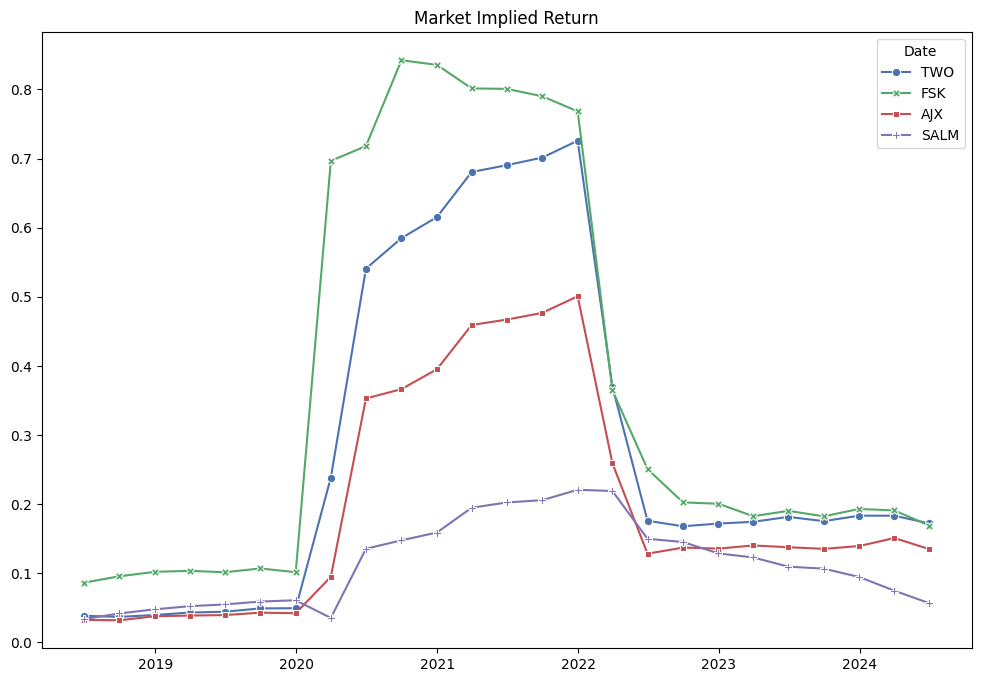

In [282]:
# prompt: plot me market prior add title market implid return

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.lineplot(data=market_prior_df, markers=True, dashes=False)
plt.title('Market Implied Return')
plt.show()


In [278]:
# Replace '2018-06-30' with the index of the row you want to convert to a list
row_list = df.loc[df.index[0]].tolist()
row_list

ESG_viewdict = {
    "TWO": 0.07,
    "FSK": 0.07,
    "AJX": 0.07,
    "SALM": 0.07
}


Value_viewdict = {
    "TWO": 0.07,
    "FSK": 0.07,
    "AJX": 0.07,
    "SALM": 0.07
}

ESG_confidences = [
    0.0,
    0.0,
    0.0,
    0.0
]
Value_confidences=row_list

def BL_Plot(viewdict, confidences,title):
  bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
  # Posterior estimate of returns
  ret_bl = bl.bl_returns()
  ret_bl
  rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
              index=[f"{title} Prior Returns", f"{title} Posterior Returns", f"{title} Views Returns"]).T
  rets_df
  rets_df.plot.bar(figsize=(12,8));

#BL_Plot(ESG_viewdict, ESG_confidences,title="ESG")
#BL_Plot(Value_viewdict, Value_confidences,title="Value")

confidences= [(esg + value) / 2 for esg, value in zip(ESG_confidences, Value_confidences)] #average our confidences
viewdict = {key: (ESG_viewdict[key] + Value_viewdict[key]) / 2 for key in ESG_viewdict} #average the two views


bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior Returns", "Posterior Returns", "Views Returns"]).T
#rets_df
#rets_df.plot.bar(figsize=(12,8));

from pypfopt import EfficientFrontier, objective_functions
S_bl = bl.bl_cov()
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
#pd.Series(weights).plot.pie(figsize=(10,10));
#plt.title('Portfolio Weights')
#from pypfopt.plotting import plot_weights
#plt.title('Portfolio Weights')
#plot_weights(weights)
#ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)
# prompt: convert weights into a df

import pandas as pd
weights_df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weight'])
weights_df=weights_df.T
# prompt: add start_date as the index date to weights_df

weights_df.index = [start_date]
weights_df



/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,AJX,FSK,SALM,TWO
2018-06-30,0.17402,0.54757,0.10329,0.17512


In [279]:

for row in range(num_rows) :
  start_date = df.index[row]
  start_date_minus_2_years = start_date - relativedelta(years=2)
  prices = yf.download(tickers, start=start_date_minus_2_years.strftime("%Y-%m-%d"), end=start_date.strftime("%Y-%m-%d"))['Adj Close']
  market_prices = yf.download("SPY", period="max")["Adj Close"] #baseline We might change this depending on the tickers
  mcaps = {}
  for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
  S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
  delta = black_litterman.market_implied_risk_aversion(market_prices)
  market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
  row_list = df.loc[df.index[row]].tolist()
  Value_confidences=row_list
  confidences= [(esg + value) / 2 for esg, value in zip(ESG_confidences, Value_confidences)] #average our confidences
  viewdict = {key: (ESG_viewdict[key] + Value_viewdict[key]) / 2 for key in ESG_viewdict} #average the two views
  bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
  ret_bl = bl.bl_returns()
  rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior Returns", "Posterior Returns", "Views Returns"]).T
  S_bl = bl.bl_cov()
  ef = EfficientFrontier(ret_bl, S_bl)
  ef.add_objective(objective_functions.L2_reg)
  ef.max_sharpe()
  weights = ef.clean_weights()
  current_weights_df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weight'])
  current_weights_df=current_weights_df.T
  current_weights_df.index = [start_date]
  weights_df = pd.concat([weights_df, current_weights_df])

weights_df




[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimizat

,AJX,FSK,SALM,TWO
2018-06-30,0.17402,0.54757,0.10329,0.17512
2018-06-30,0.17402,0.54757,0.10329,0.17512
2018-09-30,0.10175,0.59335,0.14228,0.16262
2018-12-31,0.12396,0.58234,0.15503,0.13867
2019-03-31,0.12890,0.52426,0.16701,0.17983
2019-06-30,0.12634,0.53519,0.17834,0.16013
2019-09-30,0.13948,0.50525,0.16971,0.18556
2019-12-31,0.14864,0.47285,0.18253,0.19598
2020-03-31,0.06110,0.71550,0.01185,0.21155
2020-06-30,0.11941,0.53910,0.04487,0.29661


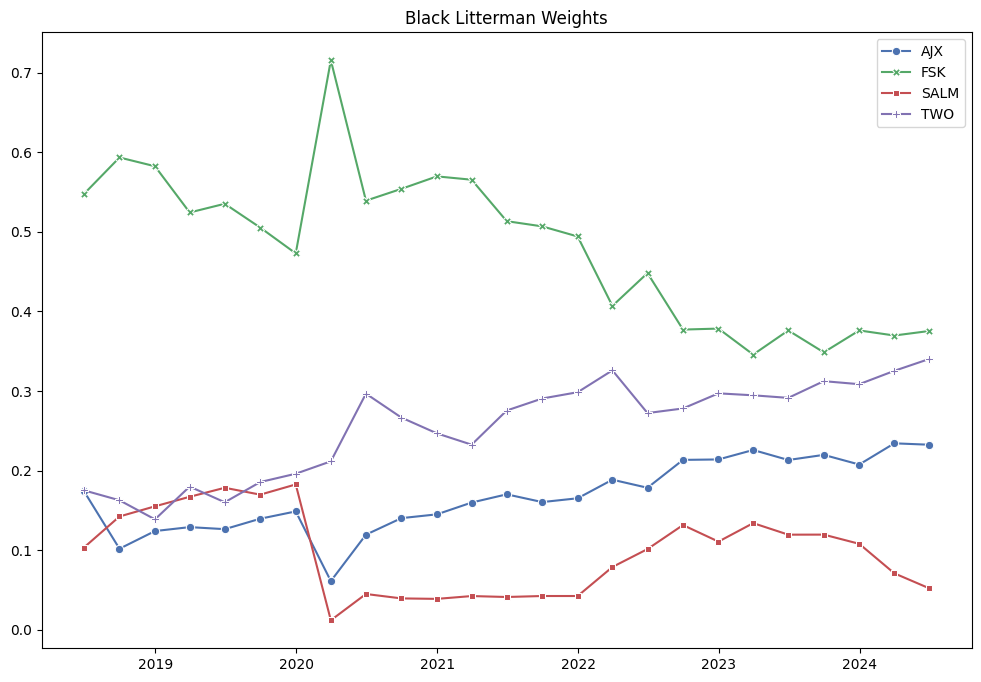

In [289]:
# prompt: plot me market prior add title market implid return

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.lineplot(data=weights_df, markers=True, dashes=False)
plt.title('Black Litterman Weights')
plt.show()
